# Carrington sunmap

In [1]:
import os
from module import toSunpyMap


folder = 'carrington_test_data/'

maps = []
for filename in os.listdir(folder):
    maps.append(toSunpyMap(folder + filename))

c:\Users\lherrington\anaconda3\envs\climso\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
import sunpy
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from sunpy.coordinates import frames


shape_out = (180, 360)  # This is set deliberately low to reduce memory consumption
header = sunpy.map.make_fitswcs_header(shape_out,
                                       SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=maps[3].date,
                                          observer='earth', frame=frames.HeliographicCarrington),
                                       scale=[360 / shape_out[1],
                                              180 / shape_out[0]] * u.deg / u.pix,
                                       projection_code="CAR")

out_wcs = WCS(header)

In [33]:
array, footprint = reproject_and_coadd(maps, out_wcs, shape_out,
                                       reproject_function=reproject_interp)

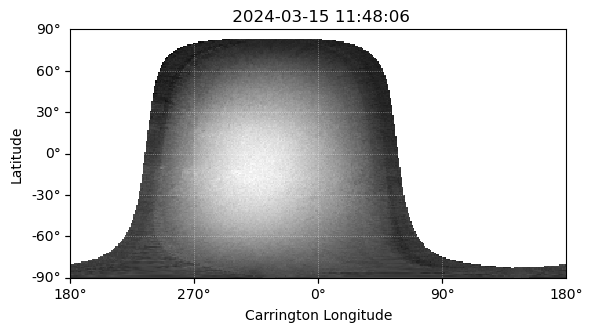

In [34]:
outmap = sunpy.map.Map((array, header))
outmap.plot_settings = maps[0].plot_settings

fig = plt.figure()
ax = fig.add_subplot(projection=outmap)
outmap.plot(axes=ax)

plt.show()